# 0. Import Package and Load Data 

In [76]:
import numpy as np 
import pandas as pd 
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd
import matplotlib.font_manager as fm
import folium
import folium.plugins
from IPython.display import IFrame
import json
warnings.filterwarnings("ignore")
fm.get_fontconfig_fonts()
font = fm.FontProperties(fname='../input/font-list/NanumBarunGothic.ttf')
plt.style.use('ggplot')
matplotlib.rc('font',family=font.get_name())
%matplotlib inline

In [77]:
time_df_list = []
age_df_list = []
for x in [201902,201903,201904,201905,202002,202003,202004,202005]:
    time_df_list.append('../input/sk-pop-flow/SK_유동인구/4_FLOW_TIME_'+str(x)+'.CSV')
    age_df_list.append('../input/sk-pop-flow/SK_유동인구/4_FLOW_AGE_'+str(x)+'.CSV')
time_df = pd.concat([pd.read_csv(path,sep='|') for path in time_df_list])
age_df = pd.concat([pd.read_csv(path,sep='|') for path in age_df_list])        

In [78]:
print('time_df shape:',time_df.shape)
print('age_df shape:',age_df.shape)

time_df shape: (16629, 28)
age_df shape: (16629, 34)


In [79]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STD_YM    16629 non-null  int64  
 1   STD_YMD   16629 non-null  int64  
 2   HDONG_CD  16629 non-null  int64  
 3   HDONG_NM  16629 non-null  object 
 4   TMST_00   16629 non-null  float64
 5   TMST_01   16629 non-null  float64
 6   TMST_02   16629 non-null  float64
 7   TMST_03   16629 non-null  float64
 8   TMST_04   16629 non-null  float64
 9   TMST_05   16629 non-null  float64
 10  TMST_06   16629 non-null  float64
 11  TMST_07   16629 non-null  float64
 12  TMST_08   16629 non-null  float64
 13  TMST_09   16629 non-null  float64
 14  TMST_10   16629 non-null  float64
 15  TMST_11   16629 non-null  float64
 16  TMST_12   16629 non-null  float64
 17  TMST_13   16629 non-null  float64
 18  TMST_14   16629 non-null  float64
 19  TMST_15   16629 non-null  float64
 20  TMST_16   16629 non-null  flo

In [80]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STD_YM                  16629 non-null  int64  
 1   STD_YMD                 16629 non-null  int64  
 2   HDONG_CD                16629 non-null  int64  
 3   HDONG_NM                16629 non-null  object 
 4   MAN_FLOW_POP_CNT_0004   16629 non-null  float64
 5   MAN_FLOW_POP_CNT_0509   16629 non-null  float64
 6   MAN_FLOW_POP_CNT_1014   16629 non-null  float64
 7   MAN_FLOW_POP_CNT_1519   16629 non-null  float64
 8   MAN_FLOW_POP_CNT_2024   16629 non-null  float64
 9   MAN_FLOW_POP_CNT_2529   16629 non-null  float64
 10  MAN_FLOW_POP_CNT_3034   16629 non-null  float64
 11  MAN_FLOW_POP_CNT_3539   16629 non-null  float64
 12  MAN_FLOW_POP_CNT_4044   16629 non-null  float64
 13  MAN_FLOW_POP_CNT_4549   16629 non-null  float64
 14  MAN_FLOW_POP_CNT_5054   16629 non-null 

In [81]:
print('time_df Has 0 value in columns:',time_df.columns[time_df.min()==0].tolist()) 
print('age_df Has 0 value in columns:',age_df.columns[age_df.min()==0].tolist())

time_df Has 0 value in columns: []
age_df Has 0 value in columns: ['MAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0004']


In [82]:
print('00~04 male mean pop flow:',age_df.MAN_FLOW_POP_CNT_0004.mean())
print('00~04 female mean pop flow:',age_df.WMAN_FLOW_POP_CNT_0004.mean())
# SK제공 유동인구데이터 (SK텔레콤 가입자 기준 --> 00~04 영유아 집계 X)

00~04 male mean pop flow: 0.25103012808948455
00~04 female mean pop flow: 0.09531601419207328


In [83]:
time_df.reset_index(drop=True,inplace=True)
age_df.reset_index(drop=True,inplace=True)

In [84]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (15,15)

geo_meta = gpd.read_file('../input/sk-pop-flow/SK_유동인구/4_.SHP')
geo_meta.head(2)

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.69963062806,35.8117467030855,"POLYGON ((1110163.050 1760631.159, 1110159.980..."
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147073408,35.838758403345,"POLYGON ((1108750.463 1760472.331, 1108750.254..."


In [85]:
print(geo_meta[:35].SIDO_NM.unique()) # index 0 ~34 : 대구    35 ~ 68 : 서울
print(geo_meta[:35].SGNG_NM.unique())

['대구광역시']
['수성구' '중구']


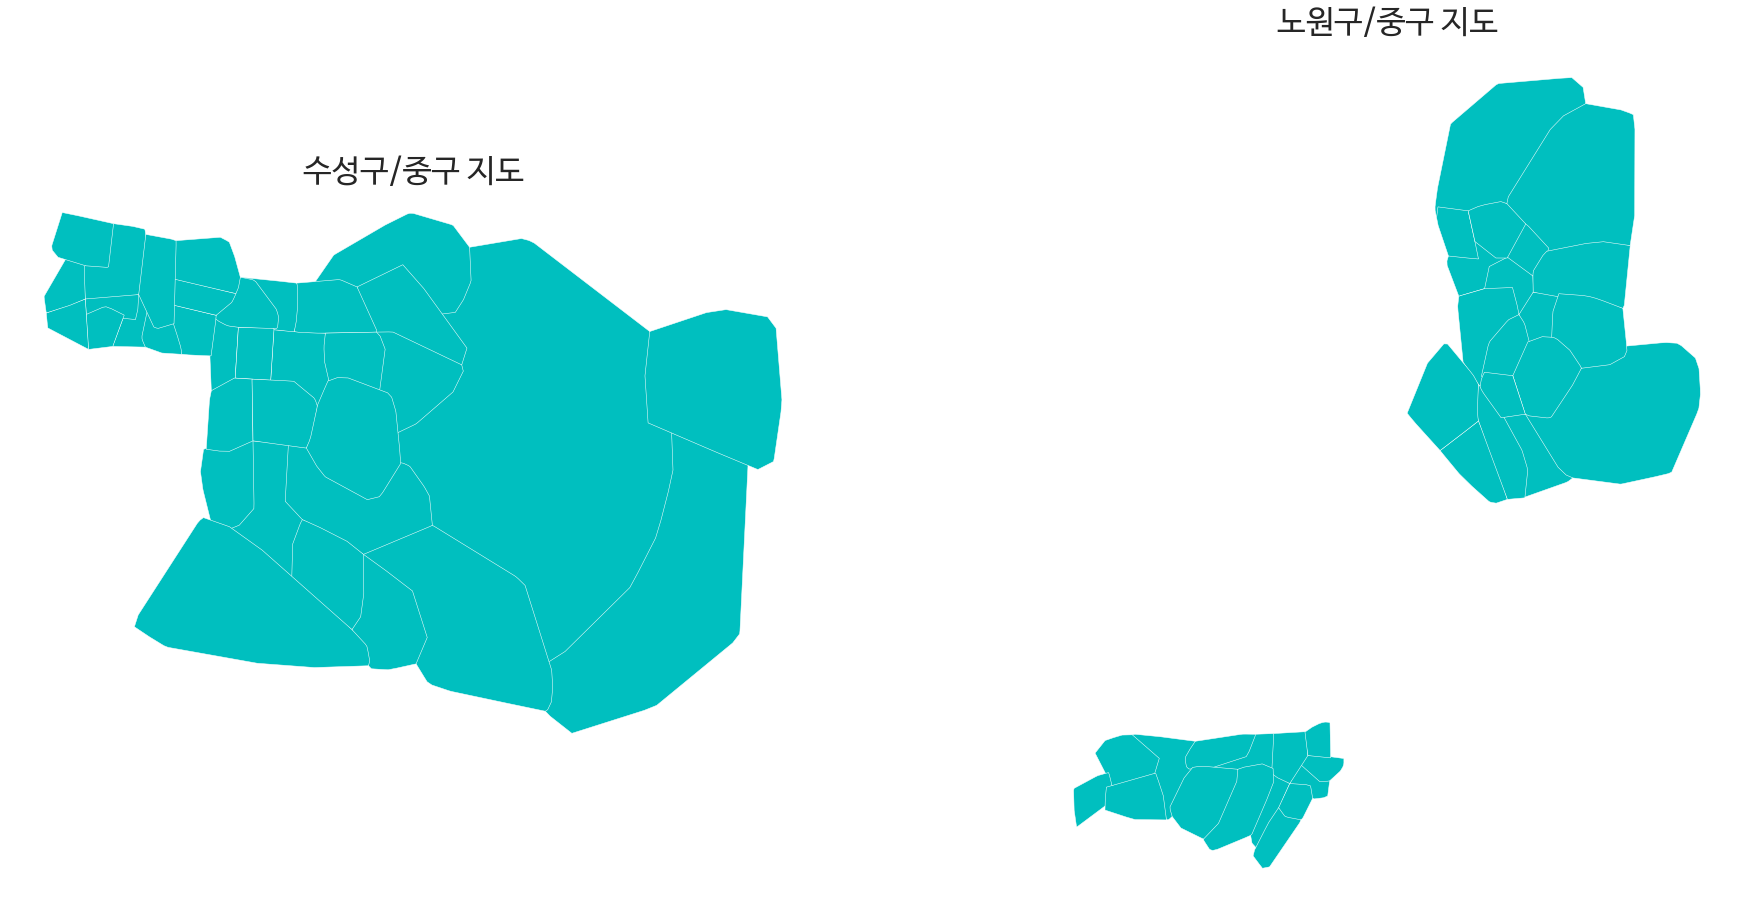

In [86]:
fig,ax = plt.subplots(1,2,figsize=(32,16))
geo_meta[:35].convex_hull.plot(color='c',edgecolor='w',ax=ax[0])
ax[0].set_title('수성구/중구 지도',fontproperties=font,size=32)
ax[0].set_axis_off()
ax[1] = geo_meta[35:].convex_hull.plot(color='c',edgecolor='w',ax=ax[1])
ax[1].set_title('노원구/중구 지도',fontproperties=font,size=32)
ax[1].set_axis_off()

plt.show()

In [87]:
geo_json = '../input/seoulgeo/seoul-dong.geojson'
geo_meta[['X_COORD','Y_COORD']]=geo_meta[['X_COORD','Y_COORD']].apply(pd.to_numeric)

In [88]:
seoul_dong_name=geo_meta[geo_meta.SIDO_NM=='서울특별시'].HDONG_NM.unique()
daegu_dong_name=geo_meta[geo_meta.SIDO_NM=='대구광역시'].HDONG_NM.unique()
print(seoul_dong_name)
print(daegu_dong_name)
print('# 중복된 동 이름:',len(seoul_dong_name.tolist()+daegu_dong_name.tolist())
      -len(set(seoul_dong_name.tolist()+daegu_dong_name.tolist())))

['공릉1동' '공릉2동' '상계10동' '상계1동' '상계2동' '상계3.4동' '상계5동' '상계6.7동' '상계8동'
 '상계9동' '월계1동' '월계2동' '월계3동' '중계1동' '중계2.3동' '중계4동' '중계본동' '하계1동' '하계2동'
 '광희동' '다산동' '동화동' '명동' '소공동' '신당5동' '신당동' '약수동' '을지로동' '장충동' '중림동' '청구동'
 '필동' '황학동' '회현동']
['고산1동' '고산2동' '고산3동' '두산동' '만촌1동' '만촌2동' '만촌3동' '범물1동' '범물2동' '범어1동'
 '범어2동' '범어3동' '범어4동' '상동' '수성1가동' '수성2.3가동' '수성4가동' '중동' '지산1동' '지산2동'
 '파동' '황금1동' '황금2동' '남산1동' '남산2동' '남산3동' '남산4동' '대봉1동' '대봉2동' '대신동' '동인동'
 '삼덕동' '성내1동' '성내2동' '성내3동']
# 중복된 동 이름: 0


In [89]:
time_df['SI_NM'] = time_df.HDONG_NM.isin(seoul_dong_name)
time_df['SI_NM']=time_df['SI_NM'].replace({True:'서울',False:'대구'})
time_df.sample(2)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,SI_NM
2201,201903,20190304,2726065100,지산1동,683.55,484.15,304.43,273.32,368.72,622.59,...,4593.37,5337.64,5523.25,5999.66,4493.02,3649.83,3162.75,2430.56,1565.63,대구
1619,201902,20190224,1135071000,상계9동,733.14,544.93,411.77,358.64,354.76,477.73,...,2151.11,2127.68,2180.10,1857.50,1627.18,1494.40,1356.43,989.76,725.01,서울


In [90]:
time_df['dayflow']=time_df.loc[:,'TMST_00':'TMST_23'].sum(axis=1)
time_df['date']=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')
gu_dict=geo_meta[['HDONG_CD','SGNG_NM']].set_index('HDONG_CD').to_dict()['SGNG_NM']
time_df['GU_NM'] = time_df['HDONG_CD'].apply(lambda x: gu_dict[str(x)] )
time_df['HDONG_CD'] = time_df['HDONG_CD'].apply(pd.to_numeric)
time_df.loc[time_df[(time_df['HDONG_CD']>=2000000000)&(time_df['GU_NM']=='중구')]['GU_NM'].index,'GU_NM'] = '대구_중구'

In [109]:
time_df.sample(7)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,SI_NM,dayflow,date,GU_NM
536,201902,20190208,2726057000,수성1가동,792.32,523.73,394.67,309.68,329.51,632.51,...,6645.02,4453.38,3571.61,3418.43,2412.20,1608.10,대구,76928.91,2019-02-08,수성구
8199,201905,20190530,2726060200,황금2동,1272.70,939.86,706.37,520.99,425.09,509.48,...,5061.26,4081.92,3369.65,3111.07,2566.97,1870.05,대구,59784.73,2019-05-30,수성구
13234,202004,20200412,2726059000,수성4가동,1313.63,893.70,703.68,499.62,459.86,431.40,...,3203.55,2895.46,2537.79,1936.68,1571.09,1322.20,대구,42812.07,2020-04-12,수성구
9537,202002,20200219,1135056000,월계1동,1359.92,789.81,617.33,493.76,599.36,878.44,...,5594.95,5517.10,3605.36,3131.17,2960.59,2068.95,서울,63587.53,2020-02-19,노원구
8735,202002,20200207,2711065000,남산2동,531.86,483.60,432.82,399.10,390.22,484.83,...,4504.31,2998.21,1981.25,1718.03,1555.21,1028.23,대구,53884.93,2020-02-07,대구_중구
1712,201902,20190225,2726060100,황금1동,675.62,491.57,312.44,267.91,381.38,526.46,...,4667.04,3676.21,3021.11,3229.68,2297.99,1357.40,대구,56004.08,2019-02-25,수성구
5978,201904,20190428,2711068000,대봉1동,1516.22,1190.12,1010.22,815.16,754.07,810.16,...,3698.38,3223.36,2938.57,2426.85,1900.82,1384.25,대구,60786.82,2019-04-28,대구_중구


# 1.  서울(중구 노원구)/대구(중구 수성구) 코로나 전후 월/주/일/시간별 유동인구 추이

In [91]:
seoul_dayflow_2019=time_df[(time_df['date']<'2020') & (time_df['HDONG_NM'].isin(seoul_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]
seoul_dayflow_2020=time_df[(time_df['date']>='2020') & (time_df['HDONG_NM'].isin(seoul_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]

In [92]:
bins=list(pd.concat([seoul_dayflow_2019,seoul_dayflow_2020])['dayflow'].quantile([0,0.1666,0.3333,0.5,0.6666,0.8333,1]))

In [110]:
with open('../input/seoulgeo/seoul-dong.geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
# bins = list(time_df['Unemployment'].quantile([0, 0.25, 0.5, 0.75, 1]))
m = folium.plugins.DualMap(location=(37.615,127.046), zoom_start=11.8)
# m = folium.Map(location=[37.615, 127.086], zoom_start=12)
folium.GeoJson(geo, name='json_data').add_to(m.m1)
m.m1.choropleth( geo_data=geo, data=seoul_dayflow_2019, columns=('HDONG_NM', 'dayflow'), 
                  key_on='feature.properties.동', fill_color = 'YlOrRd', legend_name='2019 유동 인구수',
                fill_opacity=0.8,
    line_opacity=0.5,
                bins=bins)
folium.GeoJson(geo, name='json_data').add_to(m.m2)
m.m2.choropleth( geo_data=geo, data=seoul_dayflow_2020, columns=('HDONG_NM', 'dayflow'), 
                  key_on='feature.properties.동', fill_color = 'YlOrRd', legend_name='2020 유동 인구수',fill_opacity=0.8,
    line_opacity=0.5,
                bins=bins)

m.save('./map1.html')
IFrame(src='./map1.html', width=1000, height=600)

KeyError: 'YlOrRd'

In [94]:
seoul_dayflow=time_df.groupby(['SI_NM','date']).sum().loc['서울','dayflow']
daegu_dayflow=time_df.groupby(['SI_NM','date']).sum().loc['대구','dayflow']
seoul_dayflow=seoul_dayflow.reset_index()
daegu_dayflow=daegu_dayflow.reset_index()
seoul_dayflow.drop(seoul_dayflow[seoul_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)
daegu_dayflow.drop(daegu_dayflow[daegu_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)

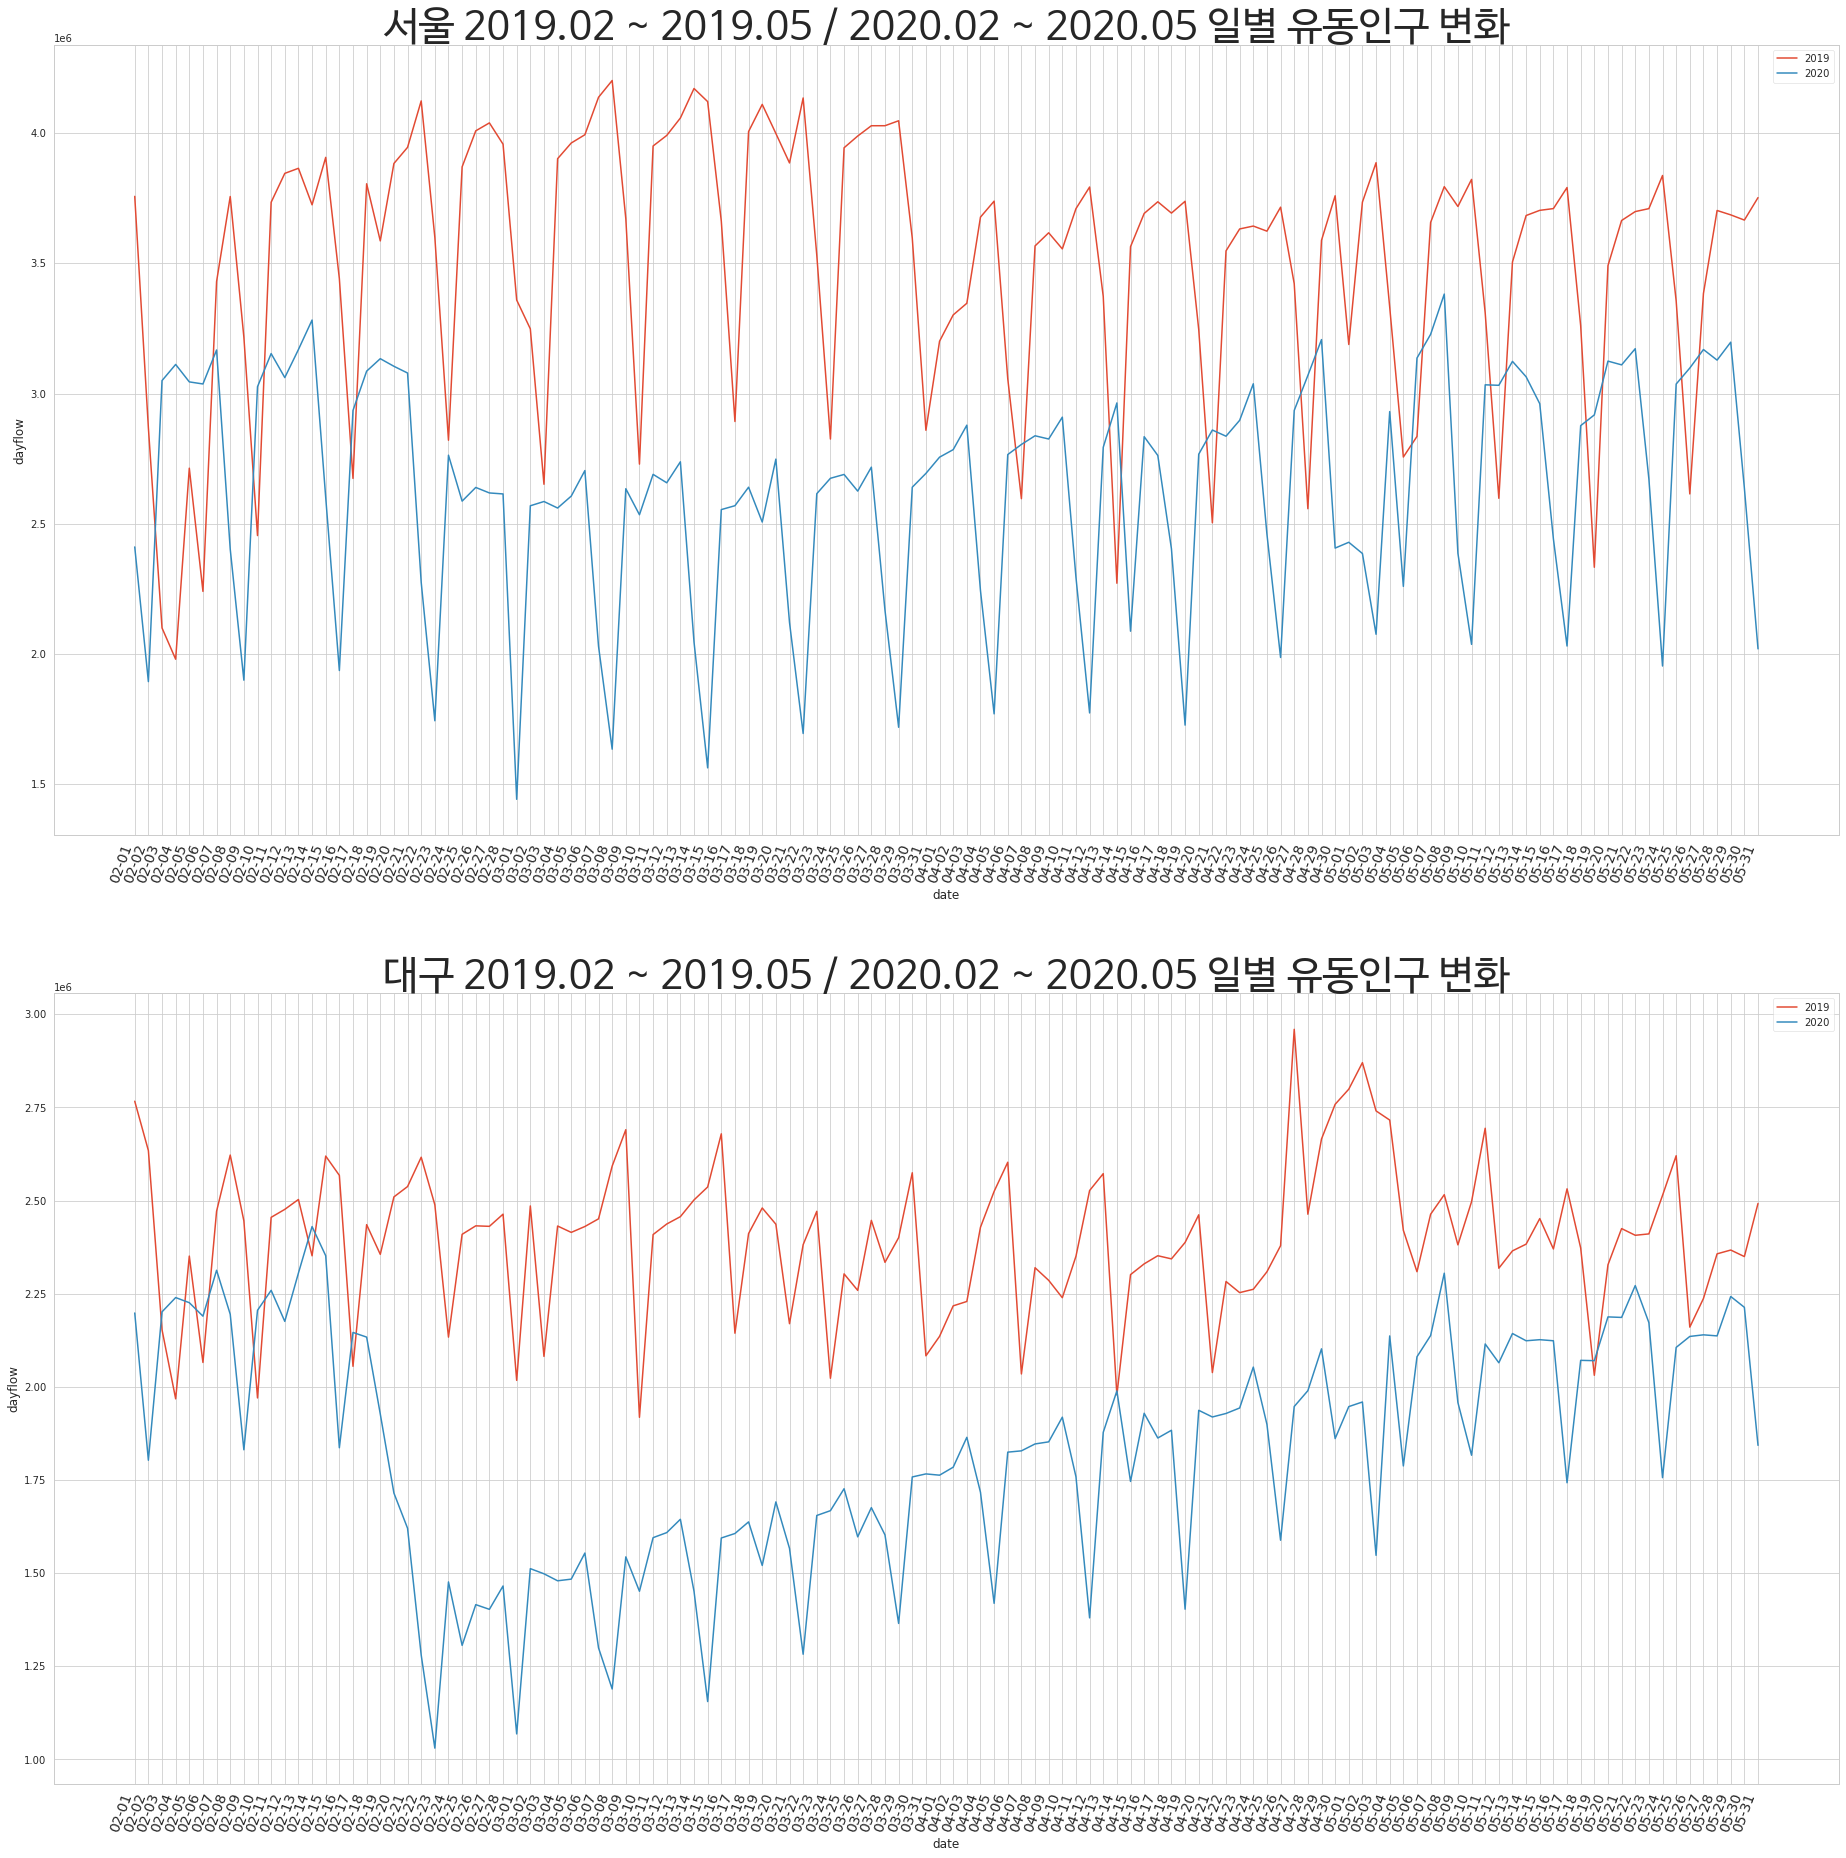

In [95]:
def compare_dayflow(df1,df2,title_1,title_2):
    
    sns.set_style("whitegrid")
    fig,ax = plt.subplots(2,1,figsize=(32,32))
    sns.lineplot(x=df1[df1.date<'2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.date<'2020']['dayflow'],ax=ax[0],label='2019')
    sns.lineplot(x=df1[df1.date>='2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.date>='2020']['dayflow'],ax=ax[0],label='2020')

    sns.lineplot(x=df2[df2.date<'2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.date<'2020']['dayflow'],ax=ax[1],label='2019')
    sns.lineplot(x=df2[df2.date>='2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.date>='2020']['dayflow'],ax=ax[1],label='2020')
    plt.setp(ax[0].get_xticklabels(), rotation=70, ha='right',size=14)
    plt.setp(ax[1].get_xticklabels(), rotation=70, ha='right',size=14)
    ax[0].set_title(title_1,fontproperties=font,size=40)
    ax[1].set_title(title_2,fontproperties=font,size=40)
    plt.legend()
    plt.show()
def compare_weekflow(df1,df2,title_1,title_2):
    
    sns.set_style("whitegrid")
    fig,ax = plt.subplots(2,1,figsize=(32,32))
    sns.lineplot(x=df1[df1.week<'2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.week<'2020']['dayflow'],ax=ax[0],label='2019')
    sns.lineplot(x=df1[df1.week>='2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.week>='2020']['dayflow'],ax=ax[0],label='2020')

    sns.lineplot(x=df2[df2.week<'2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.week<'2020']['dayflow'],ax=ax[1],label='2019')
    sns.lineplot(x=df2[df2.week>='2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.week>='2020']['dayflow'],ax=ax[1],label='2020')
    plt.setp(ax[0].get_xticklabels(), rotation=70, ha='right',size=14)
    plt.setp(ax[1].get_xticklabels(), rotation=70, ha='right',size=14)
    ax[0].set_title(title_1,fontproperties=font,size=40)
    ax[1].set_title(title_2,fontproperties=font,size=40)
    plt.legend()
    plt.show()
compare_dayflow(seoul_dayflow,daegu_dayflow,'서울 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화',
               '대구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화')

In [97]:
suseong_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['수성구','dayflow']
d_jung_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['대구_중구','dayflow']
noone_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['노원구','dayflow']
jung_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['중구','dayflow']

suseong_dayflow=suseong_dayflow.reset_index()
d_jung_dayflow=d_jung_dayflow.reset_index()
noone_dayflow=noone_dayflow.reset_index()
jung_dayflow=jung_dayflow.reset_index()

suseong_dayflow.drop(suseong_dayflow[suseong_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)
d_jung_dayflow.drop(d_jung_dayflow[d_jung_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)
noone_dayflow.drop(noone_dayflow[noone_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)
jung_dayflow.drop(jung_dayflow[jung_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)

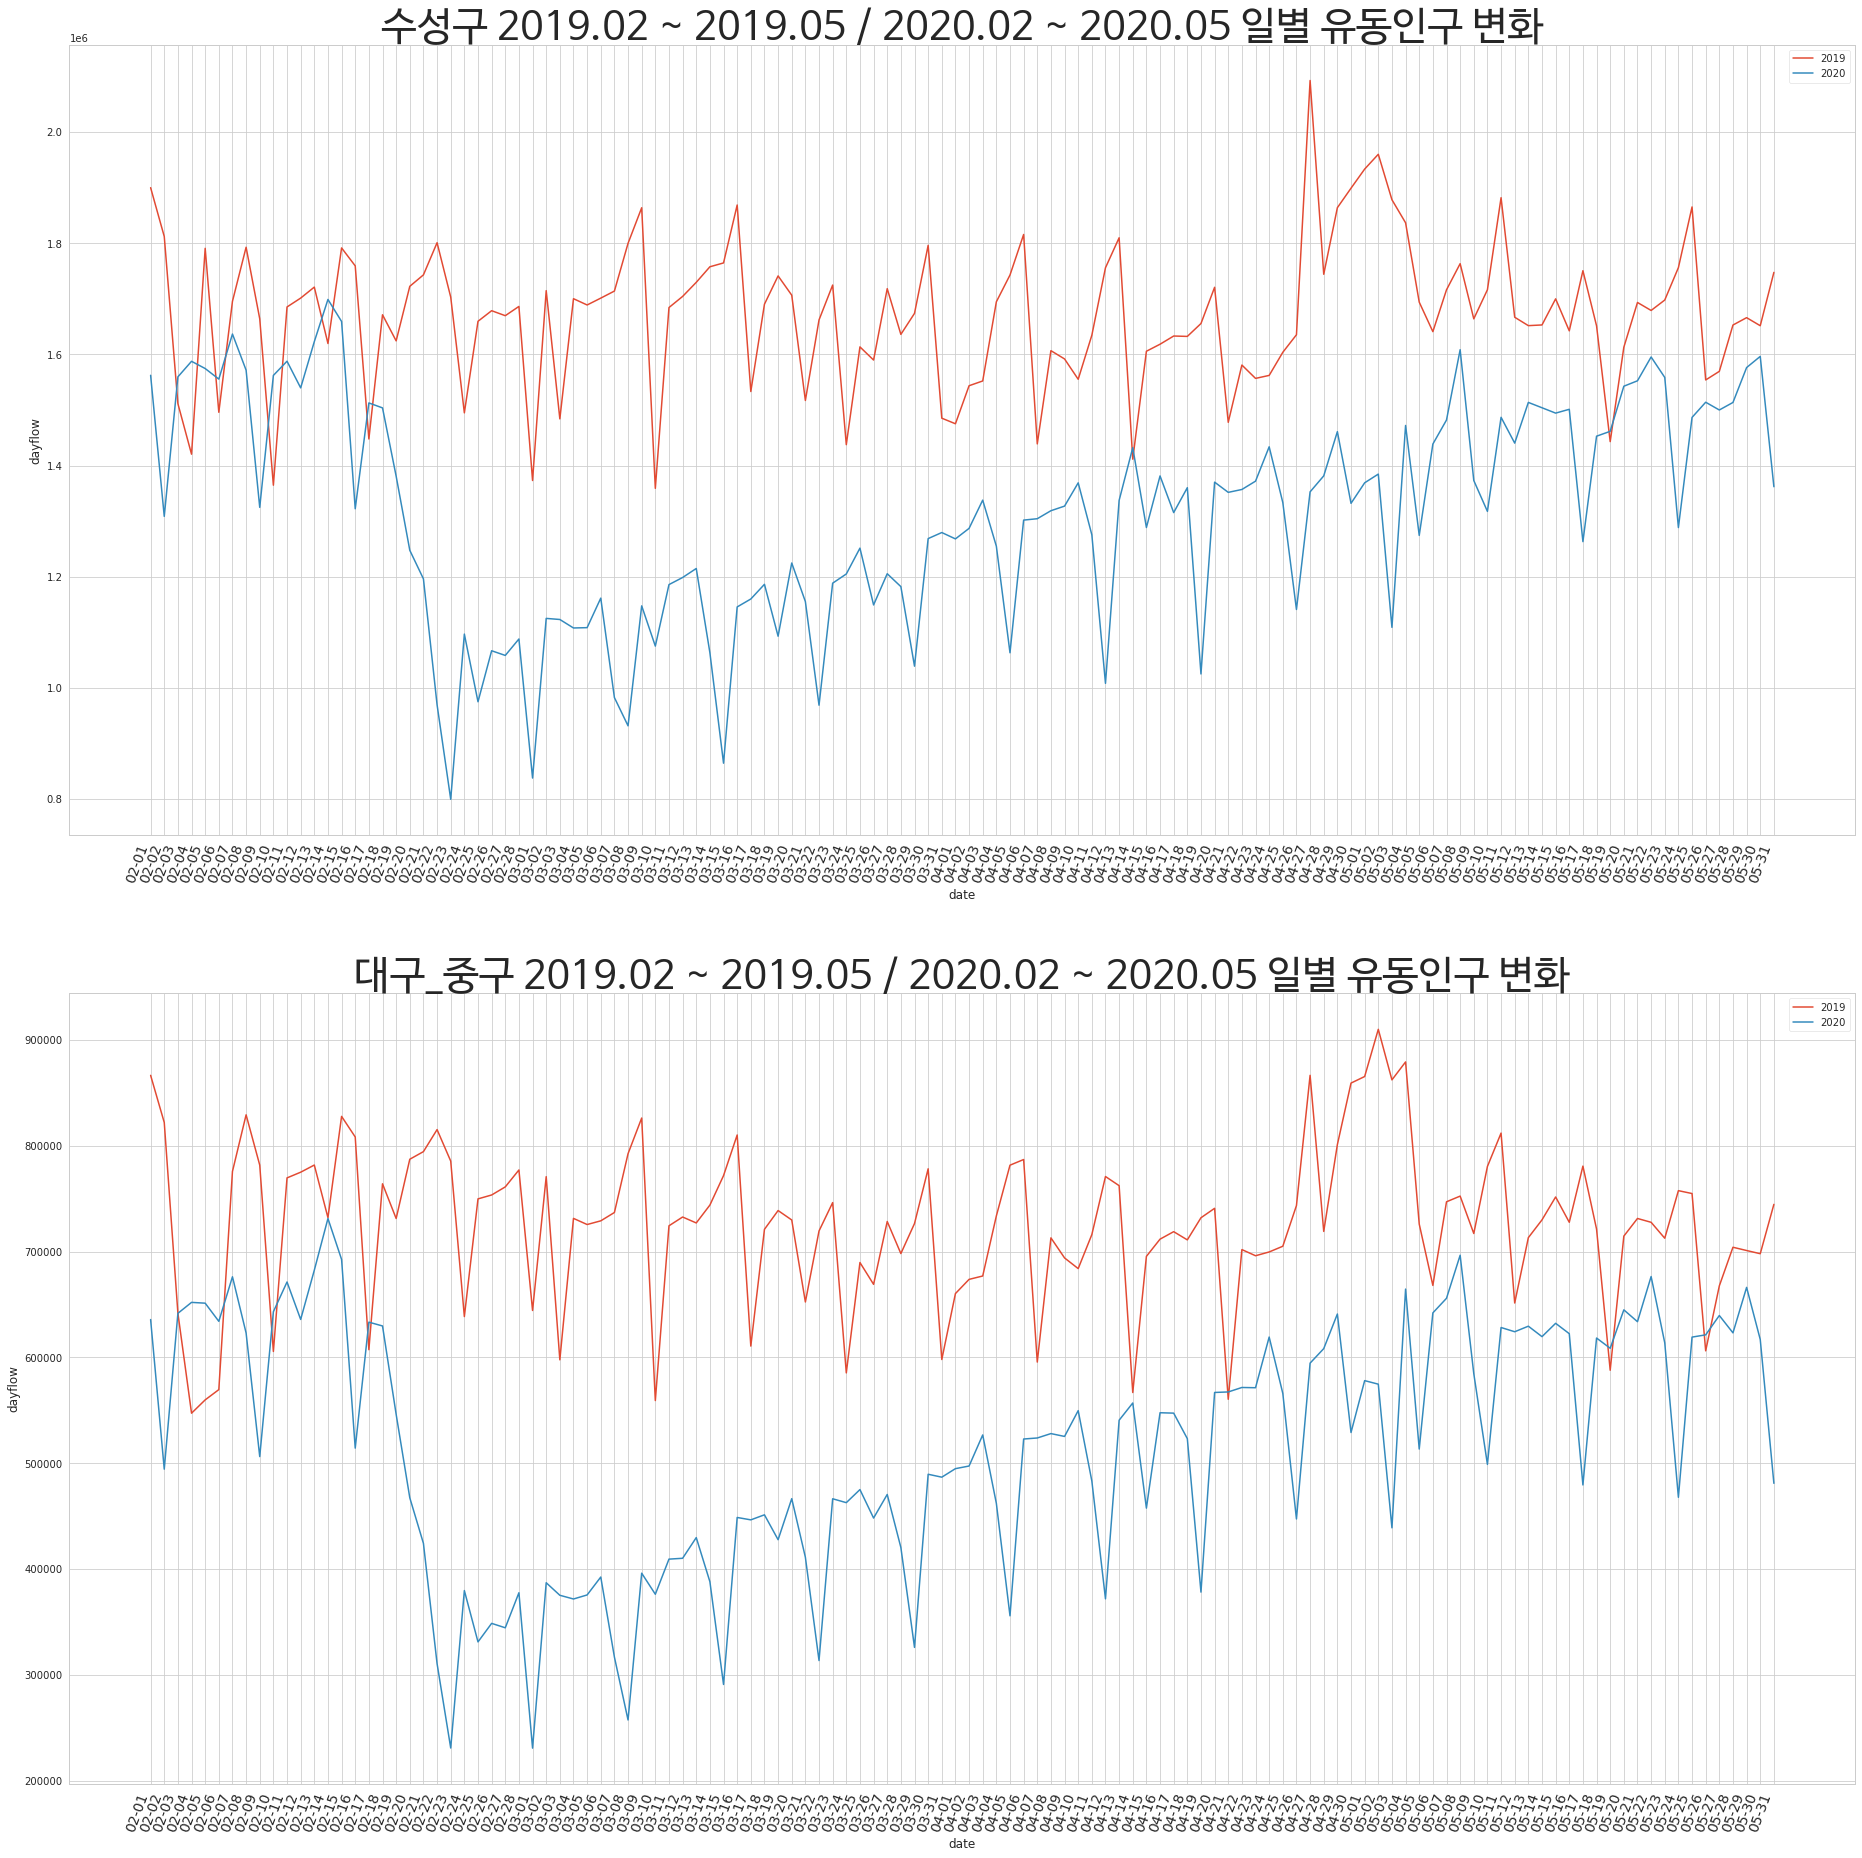

In [98]:
compare_dayflow(suseong_dayflow,d_jung_dayflow,'수성구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화',
               '대구_중구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화')

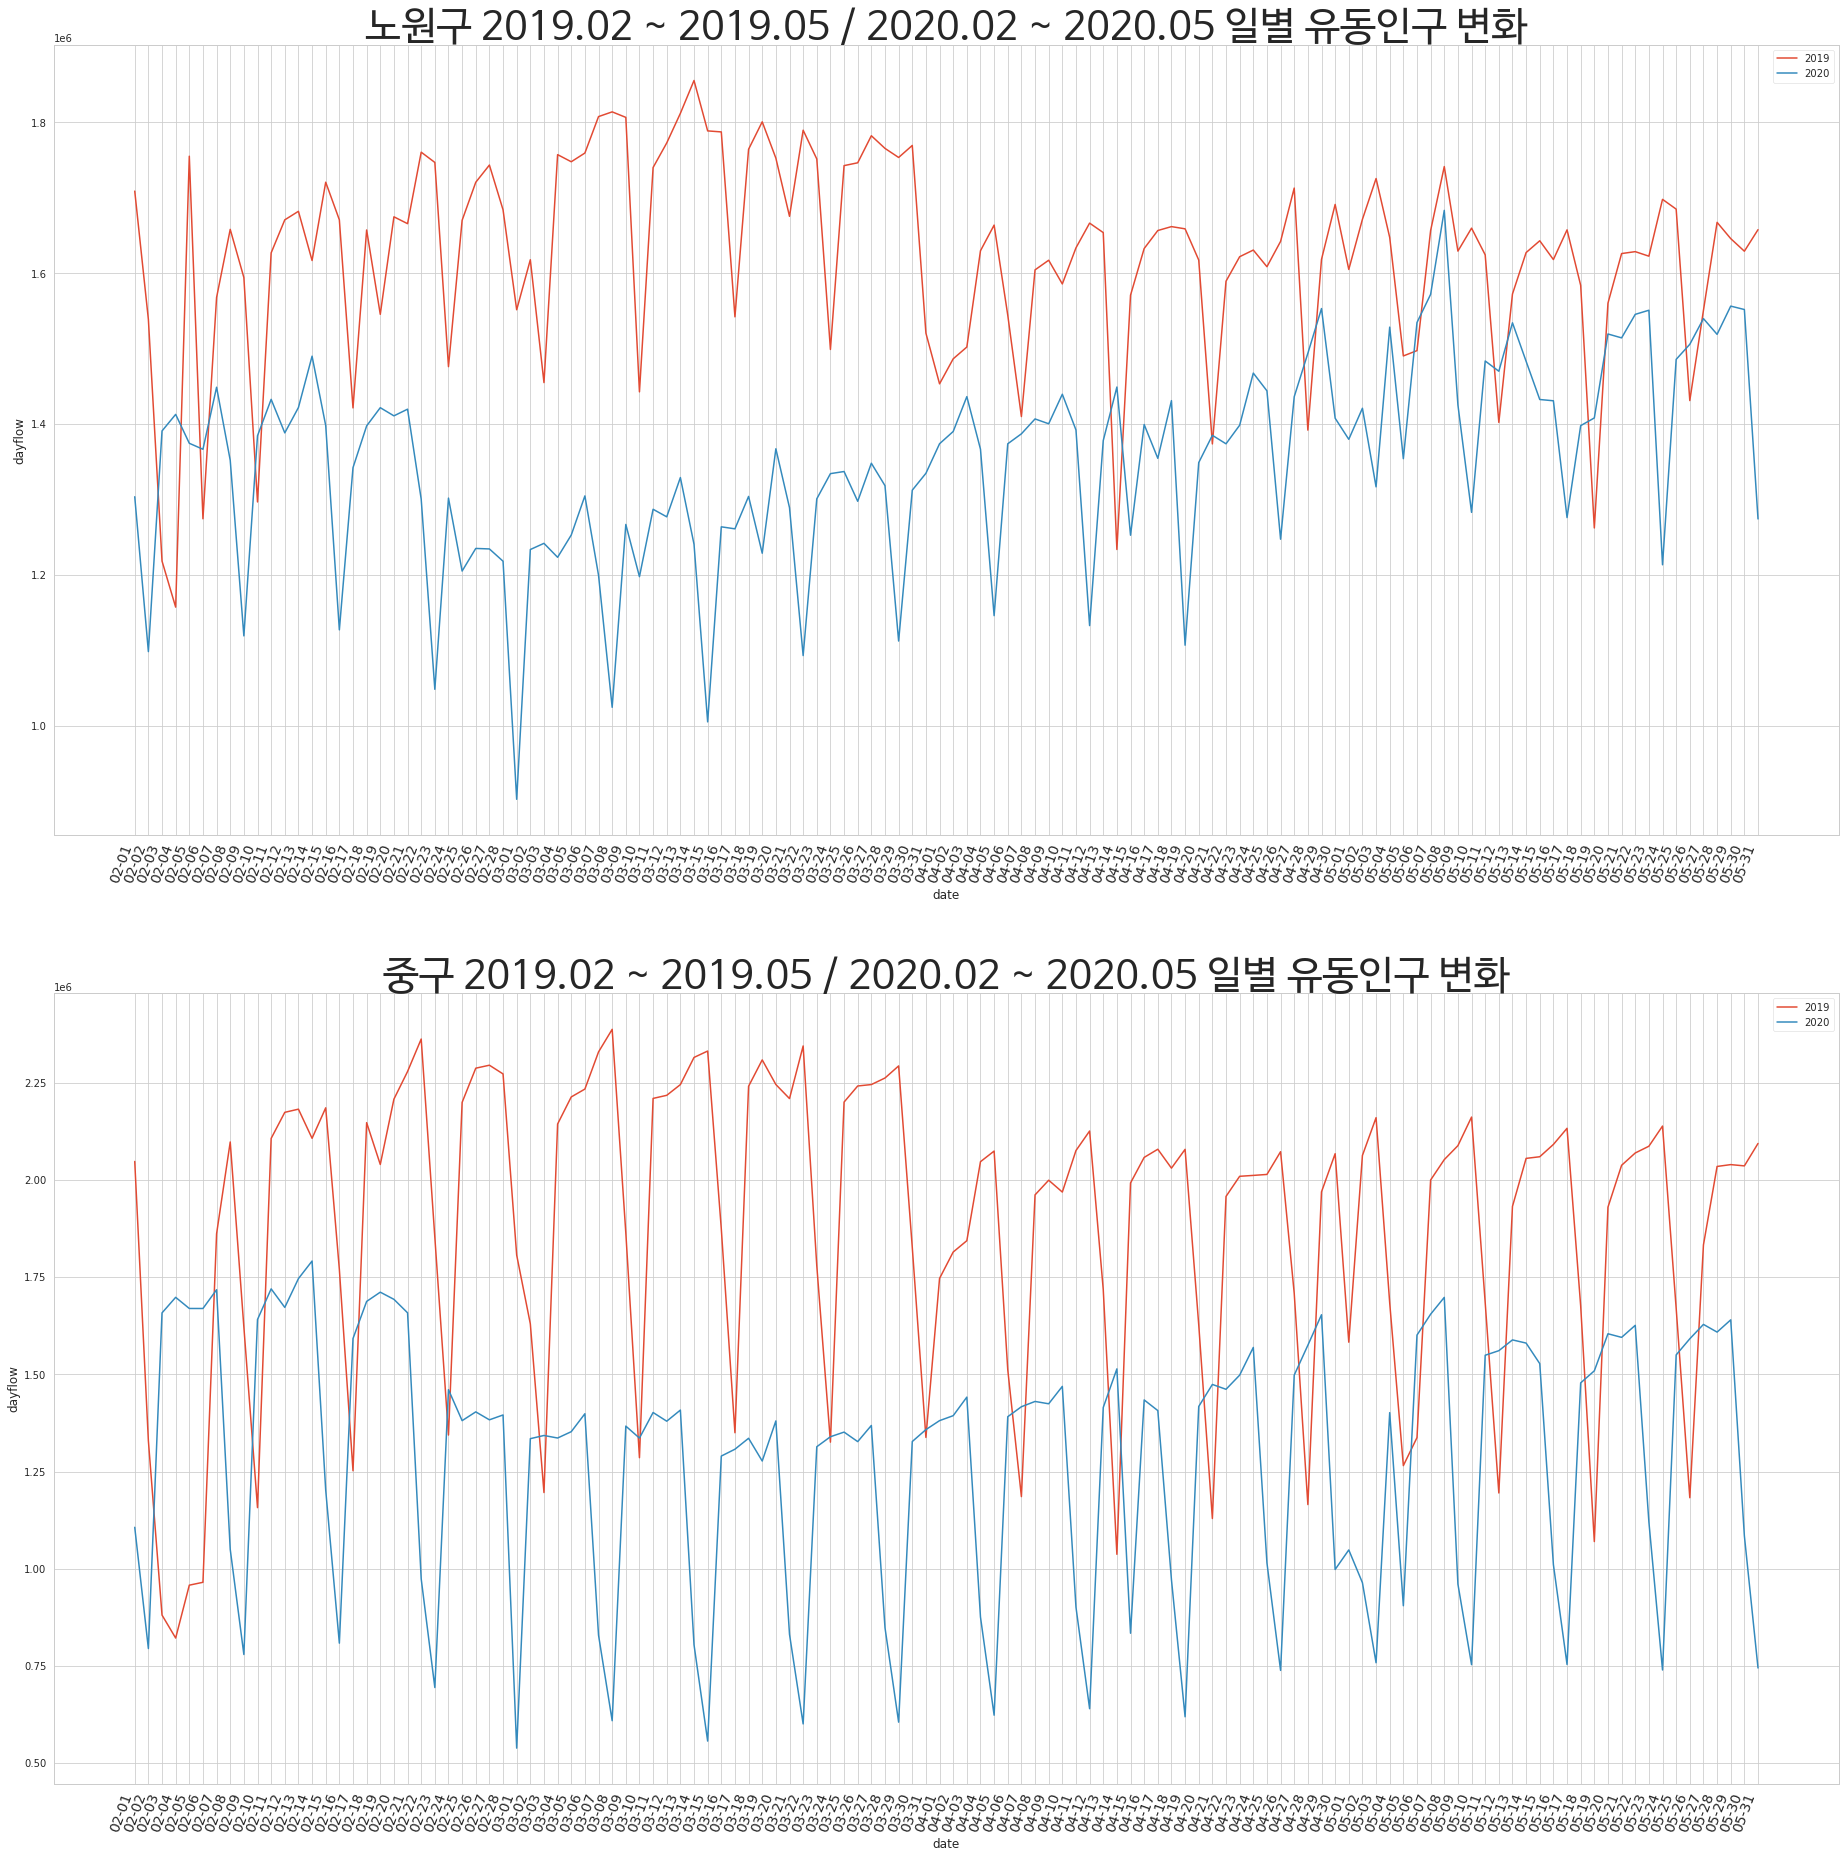

In [99]:
compare_dayflow(noone_dayflow,jung_dayflow,'노원구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화',
               '중구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화')

In [100]:
home_training_df = pd.read_csv('../input/hometraining/hometrain.csv')
home_training_df

,카테고리: 모든 카테고리
주,홈트레이닝: (대한민국)
2019-01-06,34
2019-01-13,17
2019-01-20,45
2019-01-27,34
...,...
2020-08-09,42
2020-08-16,73
2020-08-23,92
2020-08-30,73


In [101]:
home_training_df.rename(columns=home_training_df.iloc[0])
home_training_df = home_training_df.iloc[1:,:]

In [102]:
home_training_df.head()

,카테고리: 모든 카테고리
2019-01-06,34
2019-01-13,17
2019-01-20,45
2019-01-27,34
2019-02-03,36


In [103]:
home_training_df.reset_index(inplace=True)

In [104]:
home_training_df.columns = ['date','ind']

In [105]:
home_training_df['date']=pd.to_datetime(home_training_df['date'],format='%Y-%m-%d')

In [106]:
home_training_df['ind']=home_training_df['ind'].apply(pd.to_numeric)

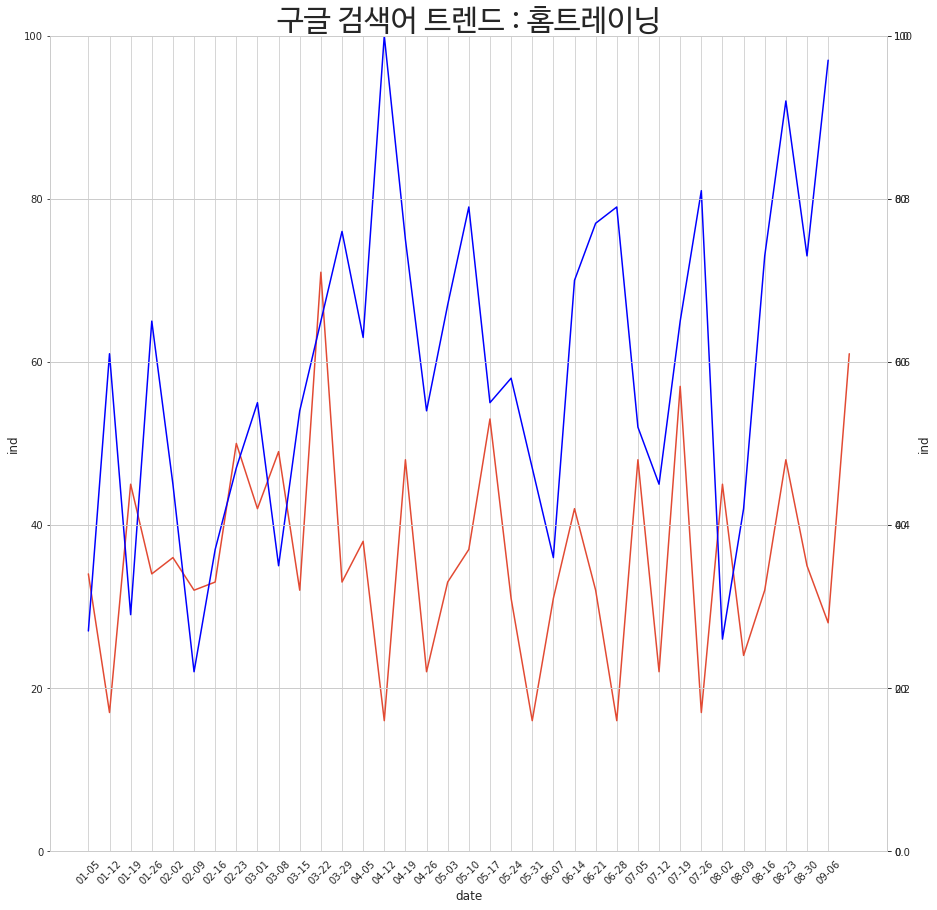

In [107]:
fig,ax=plt.subplots()
sns.lineplot(x=home_training_df[home_training_df.date<='2019-09-15']['date'].apply(lambda x : x.strftime('%m-%d')),
            y=home_training_df[home_training_df.date<='2019-09-15']['ind'],ax=ax)
ax2 =ax.twinx()
ax.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax3=ax.twinx()
# ax3.set_ylim([-100,100])
sns.lineplot(x=home_training_df[(home_training_df.date>='2020-01-01')&(home_training_df.date<='2020-09-15')]['date'].apply(lambda x : x.strftime('%m-%d')),
            y=home_training_df[(home_training_df.date>='2020-01-01')&((home_training_df.date<='2020-09-15'))]['ind'],ax=ax2,c='b')
ax.xaxis.set_tick_params(rotation=45)
# sns.lineplot(x=home_training_df[(home_training_df.date>='2020-01-01')&(home_training_df.date<='2020-09-15')]['date'].apply(lambda x : x.strftime('%m-%d')),
#              y=home_training_df[(home_training_df.date>='2020-01-01')&((home_training_df.date<='2020-09-15'))]['ind'].values-home_training_df[home_training_df.date<'2019-09-15']['ind'].values,
#              ax=ax3,c='c')
                                                                                                                           
plt.title('구글 검색어 트렌드 : 홈트레이닝',fontproperties=font,size=30)
plt.show()